# NBA Playoff Predictor Final Project

Beckett Sanderson, Marcos Equiza, Sean Ediger

April 2023

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import copy
import warnings
warnings.simplefilter(action='ignore')

In [19]:
pd.set_option('display.max_columns', None)
ALL_SEASONS = "seasons_data.csv"
CUR_SEASON = "2023_data.csv"

Reading the Data

In [20]:
# read in our csv's of data
all_df = pd.read_csv(ALL_SEASONS)
df_23 = pd.read_csv(CUR_SEASON)


# drop minutes played and attendance per game
all_df.drop(['MP', 'Attend./G'], axis=1, inplace=True)
df_23.drop(['MP', 'Attend./G'], axis=1, inplace=True)

# Make model using all attributes


In [21]:
# split the data using all features
features = all_df[all_df.columns[1:-2]]
target = all_df[['Playoff']]

X = features  # get the input features
y = target  # get the target

X_train, X_test, y_train, y_test = train_test_split(X,  # the input features
                                                    y,  # the label
                                                    test_size=0.3,  # set aside 30% of the data as the test set
                                                    random_state=7  # reproduce the results
                                                     )

# K-Nearest Neighbor Model

See which k value gets the highest accuracy

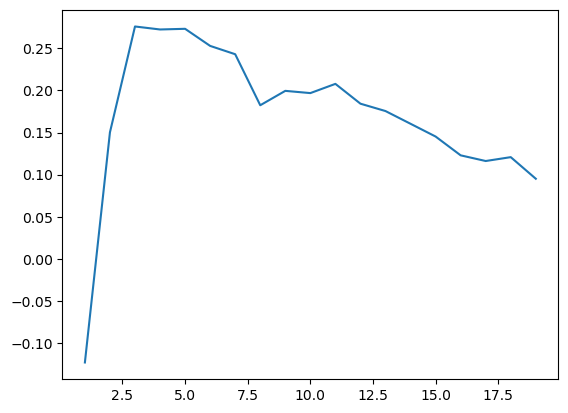

In [22]:
predictions = {}

for k in range(1, 20): #increment k by 2
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions[k] = knn.score(X_test, y_test)
    
sns.lineplot(x=predictions.keys(), y=predictions.values())
plt.show()

In [23]:
#Create the model with n_neighbors = 5
knn = KNeighborsRegressor(n_neighbors = 5) #initialize the classifier and set the number of neighbors


knn.fit(X_train, y_train)
print('The accuracy of the model is: {}'.format(knn.score(X_test, y_test)))

The accuracy of the model is: 0.27305236803671995


In [24]:
# predict the labels for the test set
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.06363247863247863


Use the model to predict the current playoffs

In [25]:
# predict the labels for the 2023 teams
df_23_new = copy.deepcopy(df_23)
teams = df_23.loc[:, 'Team']

df_23_new.drop(['Team', 'Year'], axis=1, inplace=True)
y_pred = knn.predict(df_23_new)

In [26]:
# convert teams to a 2D dataframe with a single column
teams_df = pd.DataFrame({'Team': teams})

# match outcome with team, place in descending order
outcome = pd.concat([teams_df, pd.DataFrame(y_pred, columns=['Playoff'])], axis=1)
outcome.sort_values('Playoff', ascending=False, inplace=True, ignore_index=True)
outcome

,Team,Playoff
0,Cleveland Cavaliers,0.85
1,Boston Celtics,0.45
2,Portland Trail Blazers,0.45
3,New York Knicks,0.45
4,Milwaukee Bucks,0.40
5,Los Angeles Clippers,0.40
6,Phoenix Suns,0.35
7,Toronto Raptors,0.30
8,Sacramento Kings,0.30
9,Washington Wizards,0.25


# Random Forest Model

# Linear Regression Model